In [6]:
import numpy as np
import pandas as pd
import data_clean_utils
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
import missingno as msno
import mlflow

In [15]:
import dagshub
dagshub.init(repo_owner='rahu47',repo_name='swiggy_delivery_time_prediction',mlflow=True)

Accessing as rahu47

Initialized MLflow to track repo "rahu47/swiggy_delivery_time_prediction"

Repository rahu47/swiggy_delivery_time_prediction initialized!

In [16]:
from sklearn import set_config

set_config(transform_output="pandas")

In [17]:
#load the data
df=pd.read_csv('swiggy.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [18]:
data_clean_utils.perform_data_cleaning(df)

In [19]:
# load the cleaned data
df = pd.read_csv('swiggy_cleaned.csv')
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149,short
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,BANG,25,3,friday,0,5.0,19.0,evening,20.183530,very_long
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758,short
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401,medium
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45497,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,windy,high,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45498,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,windy,jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45499,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,cloudy,low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45500,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,cloudy,high,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [20]:
# drop columns not required for model input
# Define the list of columns you want to remove
columns_to_drop = [
    'rider_id',
    'restaurant_latitude',
    'restaurant_longitude',
    'delivery_latitude',
    'delivery_longitude',
    'order_date',
    "order_time_hour",
    "order_day"
]

# Find which of these columns actually exist in the DataFrame
cols_that_exist = [col for col in columns_to_drop if col in df.columns]

# Drop only the columns that were found
df.drop(columns=cols_that_exist, inplace=True)

print(f"Successfully dropped columns: {cols_that_exist}")

Successfully dropped columns: ['rider_id', 'restaurant_latitude', 'restaurant_longitude', 'delivery_latitude', 'delivery_longitude', 'order_date', 'order_time_hour', 'order_day']


<Axes: >

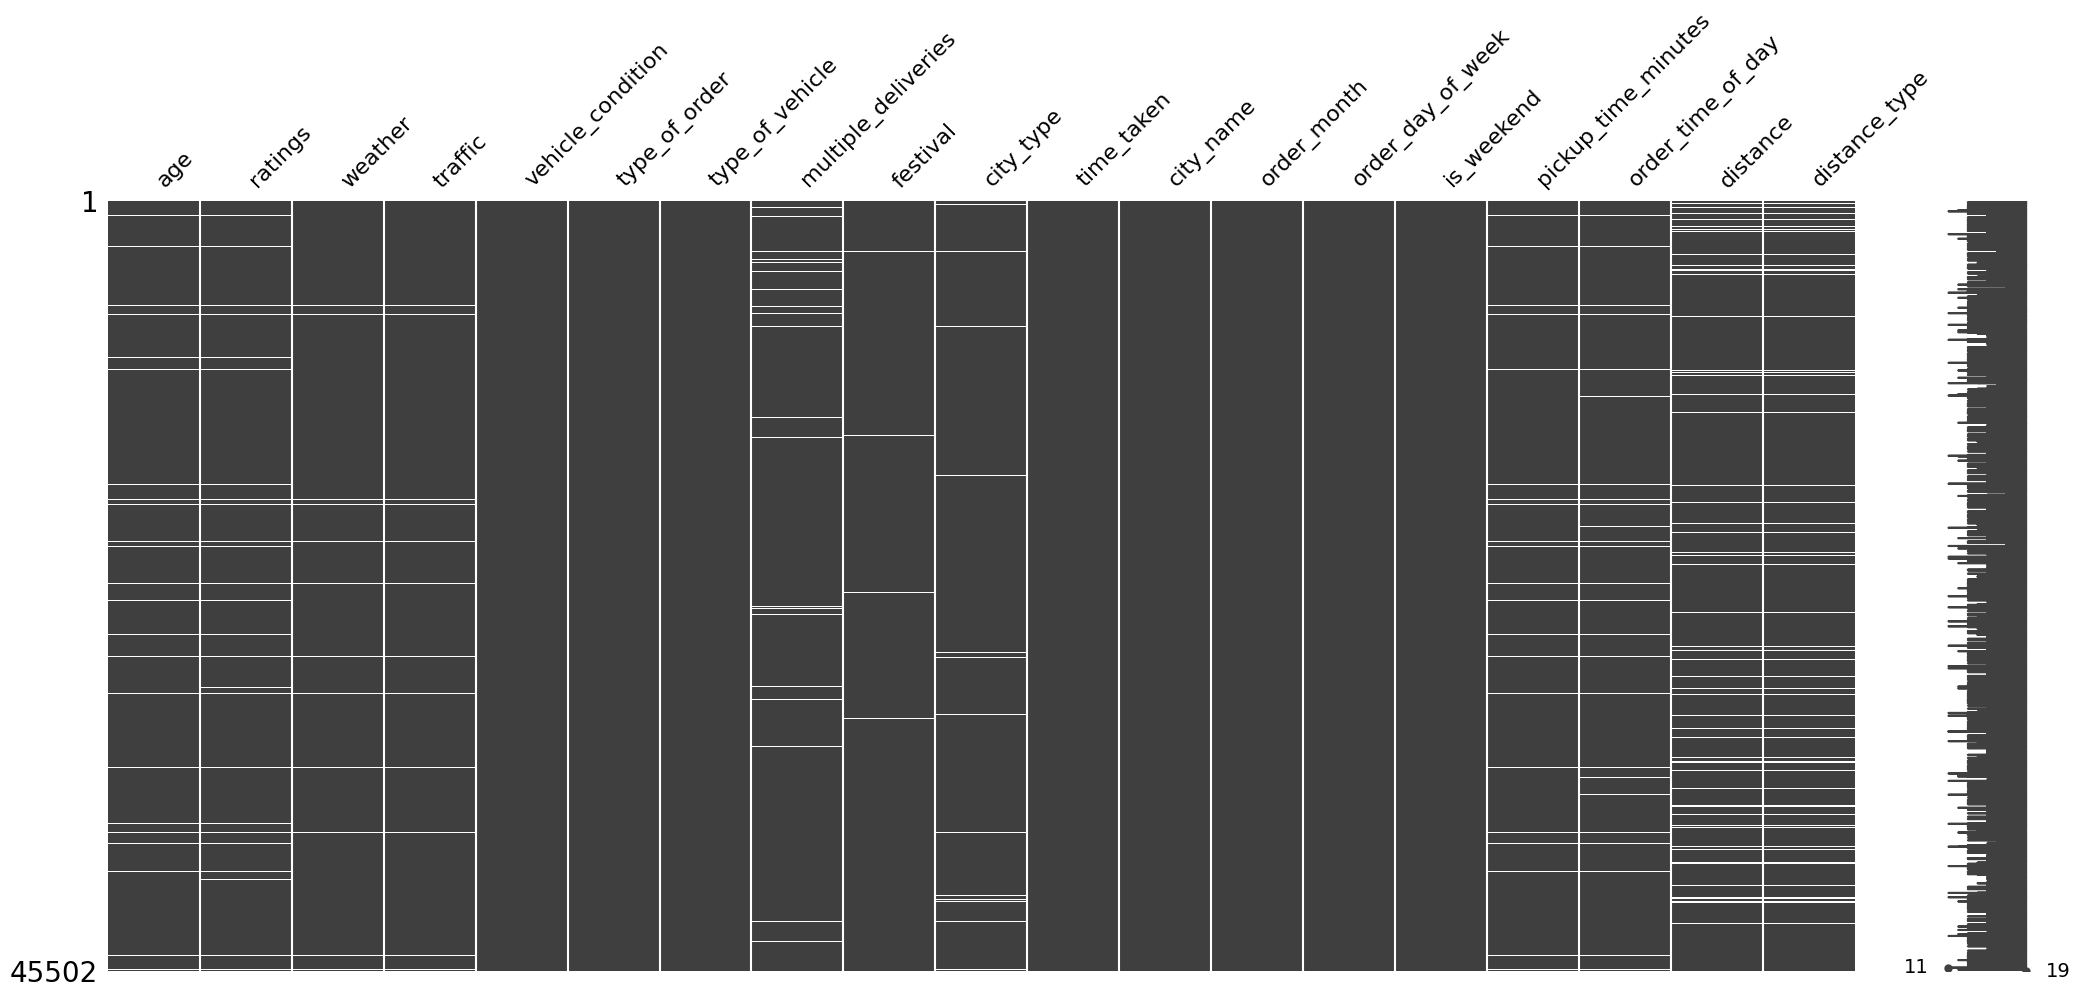

In [21]:
msno.matrix(df)

In [22]:
import mlflow
import os
# 1. Add your DagsHub credentials for authentication
os.environ['MLFLOW_TRACKING_USERNAME'] = 'rahu47'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'Ganesh@1530'
# set the tracking server
mlflow.set_tracking_uri("https://dagshub.com/rahu47/swiggy_delivery_time_prediction.mlflow")

In [23]:
# 3. Set the experiment
mlflow.set_experiment("Exp2-KeepVsDropMissingValues")

<Experiment: artifact_location='mlflow-artifacts:/332cdb76d901418e8bf26abbd9552655', creation_time=1753020727608, experiment_id='1', last_update_time=1753020727608, lifecycle_stage='active', name='Exp2-KeepVsDropMissingValues', tags={}>

In [24]:
temp_df = df.copy().dropna()

In [25]:
# split into X and y

X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']

X

,age,ratings,weather,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,37.0,4.9,sunny,high,2,snack,motorcycle,0.0,no,urban,INDO,3,saturday,1,15.0,morning,3.025149,short
1,34.0,4.5,stormy,jam,2,snack,scooter,1.0,no,metropolitian,BANG,3,friday,0,5.0,evening,20.183530,very_long
2,23.0,4.4,sandstorms,low,0,drinks,motorcycle,1.0,no,urban,BANG,3,saturday,1,15.0,morning,1.552758,short
3,38.0,4.7,sunny,medium,0,buffet,motorcycle,1.0,no,metropolitian,COIMB,4,tuesday,0,10.0,evening,7.790401,medium
4,32.0,4.6,cloudy,high,1,snack,scooter,1.0,no,metropolitian,CHEN,3,saturday,1,15.0,afternoon,6.210138,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45496,35.0,4.2,windy,jam,2,drinks,motorcycle,1.0,no,metropolitian,RANCHI,3,tuesday,0,10.0,night,16.600272,very_long
45497,30.0,4.8,windy,high,1,meal,motorcycle,0.0,no,metropolitian,JAP,3,thursday,0,10.0,morning,1.489846,short
45499,30.0,4.9,cloudy,low,1,drinks,scooter,0.0,no,metropolitian,CHEN,3,friday,0,15.0,night,4.657195,short
45500,20.0,4.7,cloudy,high,0,snack,motorcycle,1.0,no,metropolitian,COIMB,3,monday,0,5.0,afternoon,6.232393,medium


In [26]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30156, 18)
The shape of test data is (7539, 18)


In [28]:
# do basic preprocessing
num_cols = ["age", "ratings", "pickup_time_minutes", "distance"]

nominal_cat_cols = [
    'weather', 'type_of_order', 'type_of_vehicle', 'festival',
    "city_type",'city_name',"order_month", "order_day_of_week",
    "is_weekend", "order_time_of_day"
]

ordinal_cat_cols = ["traffic", "distance_type"]

In [29]:
for col in ordinal_cat_cols:
    print(col, X_train[col].unique())

traffic ['jam' 'medium' 'high' 'low']
distance_type ['medium' 'short' 'long' 'very_long']


In [30]:
# generate order for ordinal encoding
traffic_order = ["low", "medium", "high", "jam"]
distance_type_order = ["short", "medium", "long", "very_long"]

In [31]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order]), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

preprocessor.set_output(transform="pandas")

,transformers,"[('scale', ...), ('nominal_encode', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,-1
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,False
,force_int_remainder_cols,False
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [32]:
# transform the data

X_train_trans = preprocessor.fit_transform(X_train)
X_test_trans = preprocessor.transform(X_test)

X_train_trans

D:\UdemyFinal\Network_security\venv\lib\site-packages\sklearn\compose\_column_transformer.py:975: FutureWarning: The parameter `force_int_remainder_cols` is deprecated and will be removed in 1.9. It has no effect. Leave it to its default value to avoid this warning.
  warnings.warn(


,age,ratings,pickup_time_minutes,distance,weather_fog,weather_sandstorms,weather_stormy,weather_sunny,weather_windy,type_of_order_drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
8708,0.473684,0.56,1.0,0.404165,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,3.0,1.0,0,2.0
25198,1.000000,0.76,0.0,0.154044,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1.0
34049,0.473684,0.80,0.5,0.002461,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1,0.0
25987,1.000000,0.92,1.0,0.460411,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0,1.0
37121,0.526316,0.76,0.5,0.243676,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20239,0.578947,0.92,0.5,0.451895,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,3.0,2.0,0,0.0
7590,0.052632,1.00,1.0,0.612270,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,2.0,1,1.0
13610,0.526316,0.92,0.0,0.322877,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0.0
1045,0.947368,0.96,0.5,0.004486,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1.0


In [33]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train_trans, y_train_pt.values.ravel())

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
# get the predictions
y_pred_train = rf.predict(X_train_trans)
y_pred_test = rf.predict(X_test_trans)

In [23]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.15 minutes
The test error is 3.10 minutes


In [25]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.98
The test r2 score is 0.83


In [35]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [29]:
%pip install xgboost


  Using cached xgboost-3.0.2-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 3.4 MB/s eta 0:00:45
   ---------------------------------------- 1.3/150.0 MB 3.7 MB/s eta 0:00:40
    --------------------------------------- 2.4/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 3.7/150.0 MB 3.9 MB/s eta 0:00:38
   - -------------------------------------- 4.2/150.0 MB 3.8 MB/s eta 0:00:39
   - -------------------------------------- 5.0/150.0 MB 3.6 MB/s eta 0:00:40
   - -------------------------------------- 5.5/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.3/150.0 MB 3.6 MB/s eta 0:00:41
   - -------------------------------------- 6.8/150.0 MB 3.6 MB/s eta 0:00:40
   - ---------

In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

D:\UdemyFinal\Network_security\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [31]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.metrics import r2_score, mean_absolute_error

In [9]:
def objective(trial):
    with mlflow.start_run(nested=True):
        model_name = trial.suggest_categorical("model",["SVM","RF","KNN","GB","XGB","LGBM"])

        if model_name == "SVM":
            kernel_svm = trial.suggest_categorical("kernel_svm",["linear","poly","rbf"])
            if kernel_svm == "linear":
                c_linear = trial.suggest_float("c_linear",0,10)
                model = SVR(C=c_linear,kernel="linear")

            elif kernel_svm == "poly":
                c_poly = trial.suggest_float("c_poly",0,10)
                degree_poly = trial.suggest_int("degree_poly",1,5)
                model = SVR(C=c_poly,degree=degree_poly,
                            kernel="poly")
            else:
                c_rbf = trial.suggest_float("c_rbf",0,100)
                gamma_rbf = trial.suggest_float("gamma_rbf",0,10)
                model = SVR(C=c_rbf,gamma=gamma_rbf,
                            kernel="rbf")

        elif model_name == "RF":
            n_estimators_rf = trial.suggest_int("n_estimators_rf",10,200)
            max_depth_rf = trial.suggest_int("max_depth_rf",2,20)
            model = RandomForestRegressor(n_estimators=n_estimators_rf,
                                        max_depth=max_depth_rf,
                                        random_state=42,
                                        n_jobs=-1)
        elif model_name == "GB":
            n_estimators_gb = trial.suggest_int("n_estimators_gb",10,200)
            learning_rate_gb = trial.suggest_float("learning_rate_gb",0,1)
            max_depth_gb = trial.suggest_int("max_depth_gb",2,20)
            model = GradientBoostingRegressor(n_estimators=n_estimators_gb,
                                              learning_rate=learning_rate_gb,
                                              max_depth=max_depth_gb,
                                              random_state=42)

        elif model_name == "KNN":
            n_neighbors_knn = trial.suggest_int("n_neighbors_knn",1,25)
            weights_knn = trial.suggest_categorical("weights_knn",["uniform","distance"])
            model = KNeighborsRegressor(n_neighbors=n_neighbors_knn,
                                        weights=weights_knn,n_jobs=-1)

        elif model_name == "XGB":
            n_estimators_xgb = trial.suggest_int("n_estimators_xgb",10,200)
            learning_rate_xgb = trial.suggest_float("learning_rate_xgb",0.1,0.5)
            max_depth_xgb = trial.suggest_int("max_depth_xgb",2,20)
            model = XGBRegressor(n_estimators=n_estimators_xgb,
                                 learning_rate=learning_rate_xgb,
                                max_depth=max_depth_xgb,
                                 random_state=42,
                                 n_jobs=-1)

        elif model_name == "LGBM":
            n_estimators_lgbm = trial.suggest_int("n_estimators_lgbm",10,200)
            learning_rate_lgbm = trial.suggest_float("learning_rate_lgbm",0.1,0.5)
            max_depth_lgbm = trial.suggest_int("max_depth_lgbm",2,20)
            model = LGBMRegressor(n_estimators=n_estimators_lgbm,
                                  learning_rate=learning_rate_lgbm,
                                  max_depth=max_depth_lgbm,
                                  random_state=42)
        # train the model
        model.fit(X_train_trans,y_train_pt.values.ravel())


     # log model params
        mlflow.log_params(model.get_params())


      # get the predictions
        y_pred_train = model.predict(X_train_trans)
        y_pred_test = model.predict(X_test_trans)


      # get the actual predictions values
        y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
        y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))


      # calculate the error
        error = mean_absolute_error(y_test,y_pred_test_org)
      # log error
        mlflow.log_metric("MAE",error)

        return error

In [5]:
# create optuna study
study = optuna.create_study(direction="minimize",study_name="model_selection")

with mlflow.start_run(run_name="Best Model") as parent:
    # optimize the objective function
    study.optimize(objective,n_trials=30,n_jobs=-1)

    # log the best parameters
    mlflow.log_params(study.best_params)

    # log the best score
    mlflow.log_metric("best_score",study.best_value)

[I 2025-07-20 20:48:37,689] A new study created in memory with name: model_selection


NameError: name 'mlflow' is not defined

In [37]:
# best parameter value

study.best_params

{'model': 'RF', 'n_estimators_rf': 195, 'max_depth_rf': 14}

In [38]:
# best score

study.best_value

3.0629092765117956

In [43]:
rf_params = {
    "n_estimators": 195,
    "max_depth": 14
}

In [44]:
# train the model on best parameters

RF = RandomForestRegressor(**rf_params)

RF.fit(X_train_trans,y_train_pt.values.ravel())

,n_estimators,195
,criterion,'squared_error'
,max_depth,14
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [45]:
y_pred_train = RF.predict(X_train_trans)
y_pred_test = RF.predict(X_test_trans)

In [46]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 2.27 minutes
The test error is 3.06 minutes


In [48]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.91
The test r2 score is 0.83


In [4]:
# model frequency

study.trials_dataframe()['params_model'].value_counts()

NameError: name 'study' is not defined

In [50]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(regressor=RF,
                                 transformer=pt)

In [51]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model,
                         X_train_trans,
                         y_train,
                         scoring="neg_mean_absolute_error",
                         cv=5,n_jobs=-1)

In [52]:
scores

array([-3.11217783, -3.09376683, -3.10793476, -3.08162714, -3.08166768])

In [54]:
-scores.mean()

np.float64(3.095434846370239)

In [57]:
%pip install plotly

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.6 MB 2.8 MB/s eta 0:00:04
   ------- -------------------------------- 1.8/9.6 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.6 MB 3.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.7/9.6 MB 3.9 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.6 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.6 MB 3.7 MB/s eta 0:00:02
   ------------------------- -------------- 6.0/9.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------- ----------- 6.8/9.6 MB 3.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 3.7 MB/s eta 0:00:01
   ---------------------------------- ----- 8.4/9.6 MB 3.6 MB/s eta 0:00:01
   ------------------------------

In [7]:
# optimization history plot

optuna.visualization.plot_optimization_history(study)

[W 2025-07-20 20:48:56,887] There are no complete trials.
